In [27]:
# Import relevant libraries
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
# Visit the Mars news site
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
response = requests.get(url)

In [29]:
# Create a Beautiful Soup Object
# Extract all rows of data
soup = BeautifulSoup(response.text, "html.parser")

In [30]:
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.

In [31]:
table = soup.find("table")

In [32]:
# Create an empty list
data = []
# Loop through the scraped data to create a list of rows
for tr in table.find_all('tr'):
    row = []
    for td in tr.find_all(['th', 'td']):
        row.append(td.text.strip())
    if row:
        data.append(row)

In [33]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
headers = data[0]
df = pd.DataFrame(data, columns = headers)
df = df.drop(df.index[0])

In [34]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0


In [35]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [36]:
# Change data types for data analysis
df['id'] = df['id'].astype(int)
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

In [37]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [38]:
# 1. How many months are there on Mars?
unique_months = df['month'].nunique()
print(unique_months)

12


In [39]:
# 2. How many sols (Martian days) worth of data are there?
length = len(df)
print(length)

1867


In [40]:
# 3. What is the average minimum temperature by month?
mean = df.groupby(['month']).mean()
temp_df = mean['min_temp']
temp_df

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<Axes: xlabel='month'>

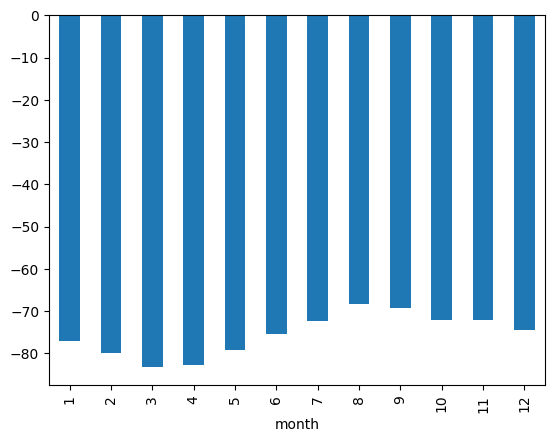

In [41]:
# Plot the average minimum temperature by month
temp_df.plot(kind='bar')

<Axes: xlabel='month'>

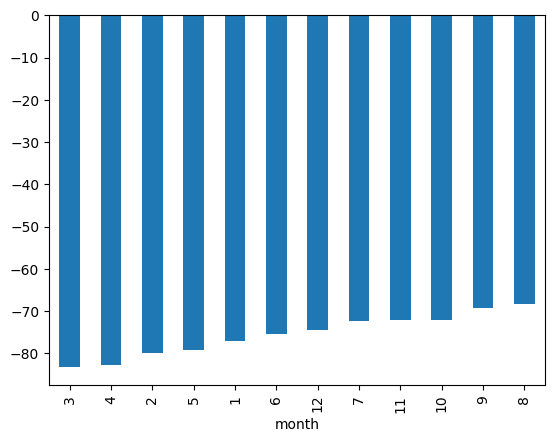

In [42]:
temp_df = temp_df.sort_values()
temp_df.plot(kind='bar')

In [43]:
# 4. What is the average pressure by month?
pressure_df = mean['pressure']
pressure_df

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<Axes: xlabel='month'>

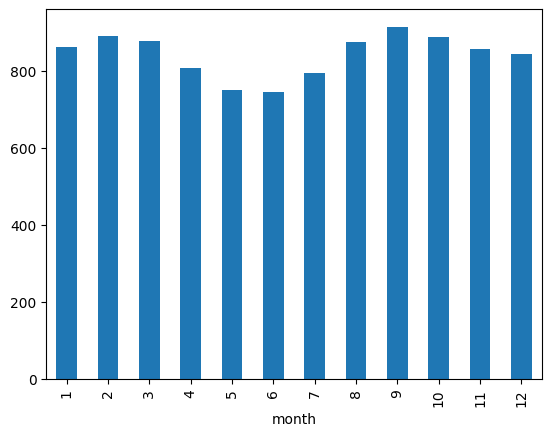

In [44]:
pressure_df.plot(kind='bar')

<Axes: xlabel='month'>

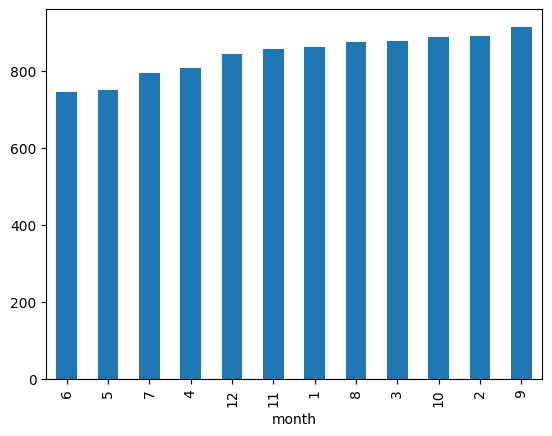

In [45]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
pressure_df = pressure_df.sort_values()
pressure_df.plot(kind='bar')

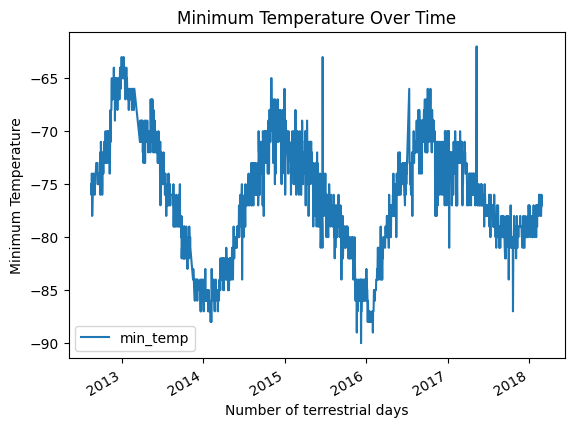

In [46]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
df.plot(kind='line', x='terrestrial_date', y='min_temp')

# Add a title and labels for x and y axis
plt.title('Minimum Temperature Over Time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature')

# Display the plot
plt.show()

In [47]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)
